In [3]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__58_Arduino_28_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST experiment_centroid_links_mutated-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [5]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,1,1.5,1,10,0.05,0,2.636364,2.333333,0.079167,0.000000,0.375417,0.0875,0.000000,0.000000,25
1,11,1.5,1,20,0.05,0,2.610390,3.666667,0.000000,0.000000,0.329167,0.0125,0.000000,0.000000,14
2,2,1.5,1,10,0.05,0,2.844156,3.333333,0.000000,0.000000,0.243750,0.0875,0.000000,0.000000,14
3,4,1.5,1,10,0.05,0,2.662338,2.666667,0.041667,0.000000,0.397917,0.0250,0.000000,0.000000,20
4,8,1.5,1,10,0.05,0,2.909091,3.333333,0.037500,0.000000,0.374286,0.1375,0.000000,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,324,5.5,5,40,0.15,86,2.866667,2.885714,0.733834,1.531646,0.665625,21.0000,-0.251808,-0.081754,1480
29480,324,5.5,5,40,0.15,87,3.133333,2.771429,0.734091,1.531329,0.665787,20.9875,-0.501808,0.055746,1481
29481,324,5.5,5,40,0.15,88,2.755556,2.914286,0.734091,1.531329,0.665787,20.9875,-0.714308,-0.006754,1481
29482,324,5.5,5,40,0.15,89,2.844444,2.714286,0.734091,1.531329,0.665787,20.9875,-0.676808,-0.269254,1481


In [6]:
df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.724612        1.498468      0.041049   
                      1         2.762905        2.544962      0.055247   
                      2         2.922839        2.727229      0.065104   
                      3         2.967566        2.609250      0.074147   
                      4         2.933038        2.559349      0.081103   
...                                  ...             ...           ...   
5.5                   86        2.897671        2.586804      0.697399   
                      87        2.951530        2.554488      0.697861   
                      88        2.896412        2.423687      0.698513   
                      89        2.785369        2.456442      0.699299   
                      90        3.048370        2.588462      0.699939   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.279515     0.068171    0.000000   
                      1     0.000000   0.295590     0.193981    0.072456   
                      2     0.000000   0.334471     0.329630    0.059289   
                      3     0.000000   0.349604     0.645486    0.051888   
                      4     0.000000   0.363981     1.001273    0.055935   
...                              ...        ...          ...         ...   
5.5                   86    1.632006   0.524528    39.985185   -0.167516   
                      87    1.628733   0.525590    39.833449   -0.185803   
                      88    1.626248   0.526374    39.723611   -0.196914   
                      89    1.623488   0.527290    39.600579   -0.204437   
                      90    1.647902   0.528190    39.501273   -0.214044   

                            centroid-y  
radius-of-interaction step              
1.5                   0       0.000000  
                      1       0.080096  
                      2       0.074513  
                      3       0.054770  
                      4       0.054431  
...                                ...  
5.5                   86     -0.167026  
                      87     -0.135892  
                      88     -0.133809  
                      89     -0.136702  
                      90     -0.122466  

[273 rows x 8 columns]

In [7]:
df_move=df4.groupby(['movement-steps','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
movement-steps step                                                         
1              0         2.710088        1.541683      0.231360  0.000000   
               1         2.740495        2.495417      0.314889  0.268920   
               2         2.901107        2.598105      0.352734  0.399555   
               3         2.941551        2.599645      0.378214  0.476603   
               4         2.935018        2.483356      0.393752  0.499276   
...                           ...             ...           ...       ...   
5              86        2.905567        2.659222      0.484130  1.086228   
               87        2.964337        2.606889      0.485052  1.084599   
               88        2.916540        2.474256      0.486236  1.082947   
               89        2.804099        2.512472      0.487791  1.081303   
               90        3.067883        2.666080      0.489394  1.079867   

                     closeness  betweenness  centroid-x  centroid-y  \
movement-steps step                                                   
1              0      0.310786    60.989120    0.000000    0.000000   
               1      0.310629    59.929051   -0.226751   -0.097269   
               2      0.319821    58.069676   -0.223959   -0.098780   
               3      0.323709    58.819560   -0.228355   -0.088023   
               4      0.329336    57.798032   -0.226411   -0.083183   
...                        ...          ...         ...         ...   
5              86     0.507153    32.170949    0.011037    0.134240   
               87     0.508321    32.037037    0.011152    0.157041   
               88     0.509189    31.980903    0.013930    0.149865   
               89     0.510154    31.886343    0.042402    0.140722   
               90     0.511257    31.798032    0.055712    0.142342   

                          links  
movement-steps step              
1              0      80.611111  
               1     103.675926  
               2     117.435185  
               3     128.101852  
               4     136.666667  
...                         ...  
5              86    713.194444  
               87    717.805556  
               88    722.240741  
               89    726.750000  
               90    730.888889  

[273 rows x 9 columns]

In [8]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

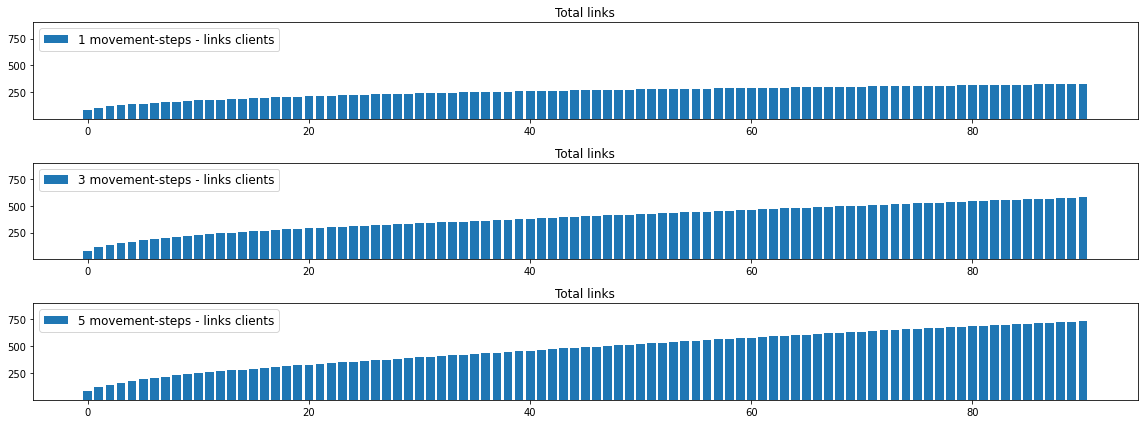

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

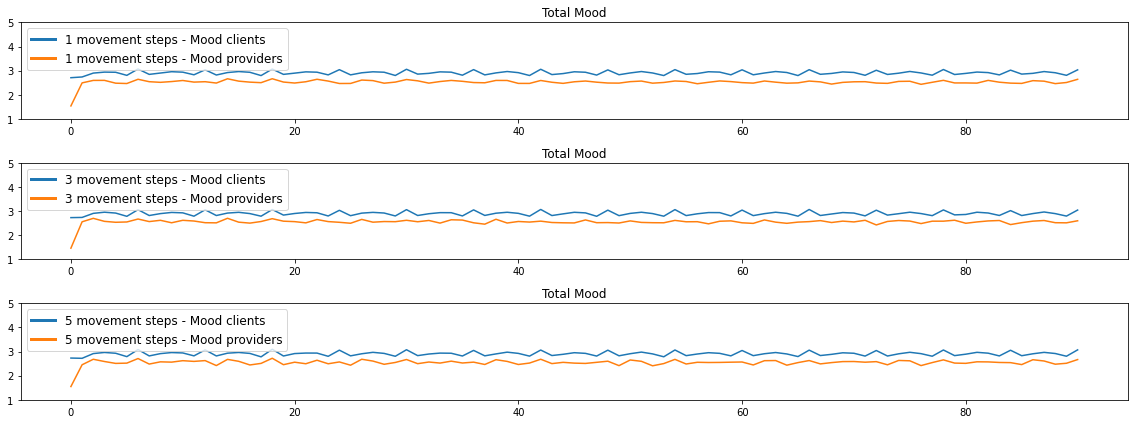

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_clients'], label='{} movement steps - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_providers'], label='{} movement steps - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



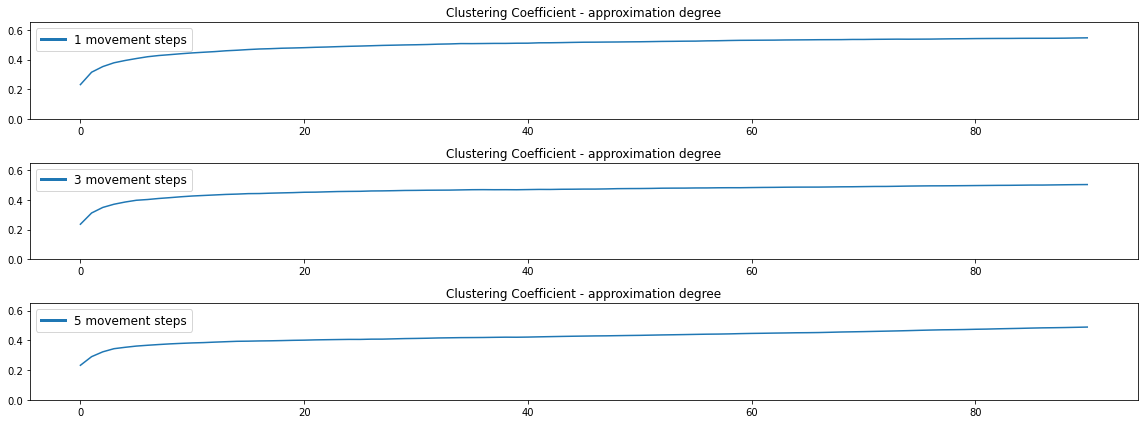

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['cluster_coef'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



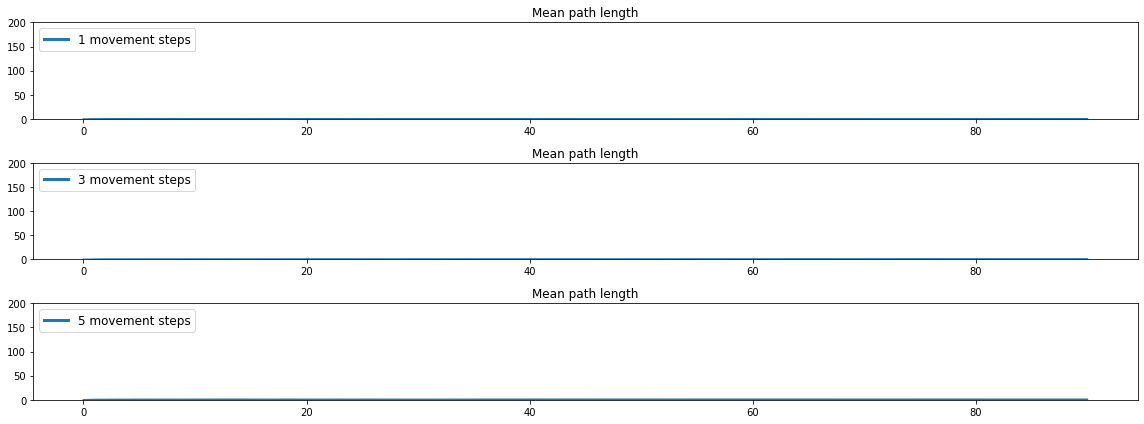

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['paths'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



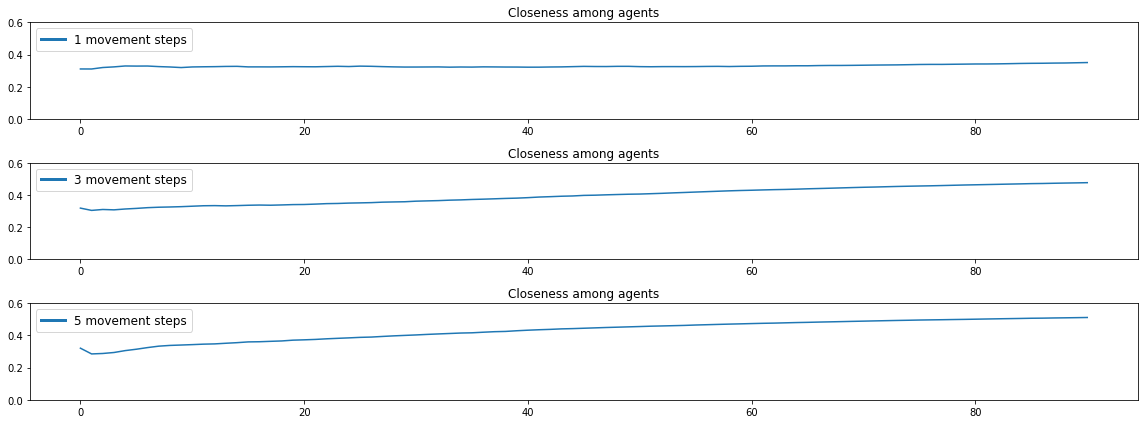

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['closeness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



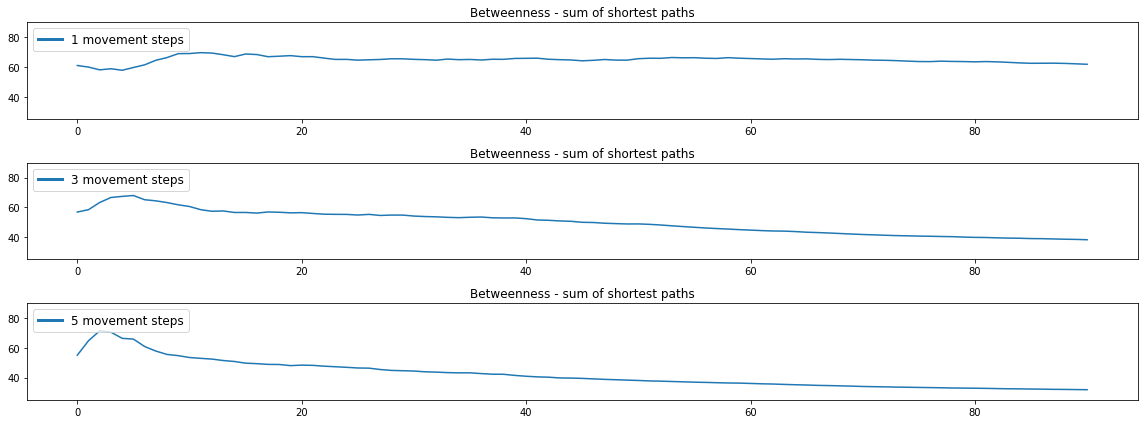

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [15]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].mean()

In [16]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1]

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,1,0,2.710088,1.541683,0.231360,0.000000,0.310786,60.989120,0.000000,0.000000,80.611111,4.251771
1,1,1,2.740495,2.495417,0.314889,0.268920,0.310629,59.929051,-0.226751,-0.097269,103.675926,5.235912
2,1,2,2.901107,2.598105,0.352734,0.399555,0.319821,58.069676,-0.223959,-0.098780,117.435185,5.499213
3,1,3,2.941551,2.599645,0.378214,0.476603,0.323709,58.819560,-0.228355,-0.088023,128.101852,5.541197
4,1,4,2.935018,2.483356,0.393752,0.499276,0.329336,57.798032,-0.226411,-0.083183,136.666667,5.418374
...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,86,2.890751,2.587836,0.543147,0.577124,0.346251,62.515278,-0.212522,-0.199618,322.277778,5.478588
87,1,87,2.964145,2.566201,0.543272,0.607891,0.347275,62.562500,-0.210554,-0.212813,323.796296,5.530346
88,1,88,2.915501,2.464732,0.543977,0.606824,0.347885,62.413310,-0.200369,-0.210151,325.500000,5.380233
89,1,89,2.808821,2.511412,0.545213,0.628897,0.349262,62.127315,-0.198286,-0.210961,326.990741,5.320233


In [17]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [18]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,0.1407,0.8882
1,mood_providers,-0.9284,0.3545
2,cluster_coef,10.297,0.0
3,paths,-33.2978,0.0
4,closeness,-15.0429,0.0
5,betweenness,22.3119,0.0
6,centroid-x,-27.3502,0.0
7,centroid-y,-22.6031,0.0
8,links,-11.707,0.0
9,total_mood,-0.5666,0.5717


In [19]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.0198,0.8882
1,mood_providers,0.8619,0.3545
2,cluster_coef,106.0282,0.0
3,paths,1108.7414,0.0
4,closeness,226.2896,0.0
5,betweenness,497.8215,0.0
6,centroid-x,748.0341,0.0
7,centroid-y,510.8992,0.0
8,links,137.0544,0.0
9,total_mood,0.321,0.5717


In [20]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:].columns

Index(['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [22]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.2654
mood_providers   -0.0492
cluster_coef      0.8767
paths             0.1153
closeness        -0.0314
betweenness       0.2194
total_mood        0.9676
centroid-x        0.4180
centroid-y        0.5211
dtype: float64

In [23]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.2490
mood_providers    0.2052
cluster_coef      0.7804
paths            -0.4782
closeness         0.9888
betweenness       0.9280
total_mood        0.9905
centroid-x       -0.5526
centroid-y       -0.0302
dtype: float64

In [24]:
df_move.reset_index()

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,1,0,2.7101,1.5417,0.2314,0.0000,0.3108,60.9891,0.0000,0.0000,80.6111,4.2518
1,1,1,2.7405,2.4954,0.3149,0.2689,0.3106,59.9291,-0.2268,-0.0973,103.6759,5.2359
2,1,2,2.9011,2.5981,0.3527,0.3996,0.3198,58.0697,-0.2240,-0.0988,117.4352,5.4992
3,1,3,2.9416,2.5996,0.3782,0.4766,0.3237,58.8196,-0.2284,-0.0880,128.1019,5.5412
4,1,4,2.9350,2.4834,0.3938,0.4993,0.3293,57.7980,-0.2264,-0.0832,136.6667,5.4184
...,...,...,...,...,...,...,...,...,...,...,...,...
268,5,86,2.9056,2.6592,0.4841,1.0862,0.5072,32.1709,0.0110,0.1342,713.1944,5.5648
269,5,87,2.9643,2.6069,0.4851,1.0846,0.5083,32.0370,0.0112,0.1570,717.8056,5.5712
270,5,88,2.9165,2.4743,0.4862,1.0829,0.5092,31.9809,0.0139,0.1499,722.2407,5.3908
271,5,89,2.8041,2.5125,0.4878,1.0813,0.5102,31.8863,0.0424,0.1407,726.7500,5.3166


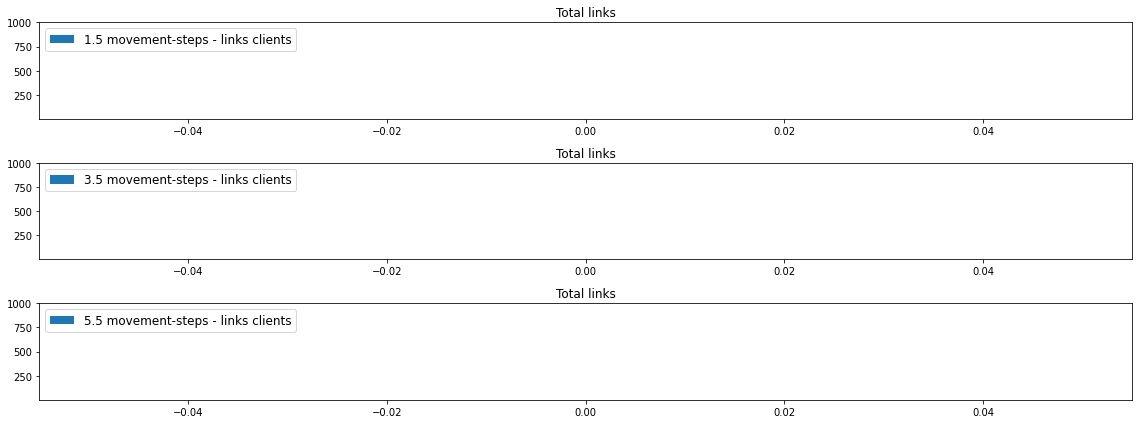

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

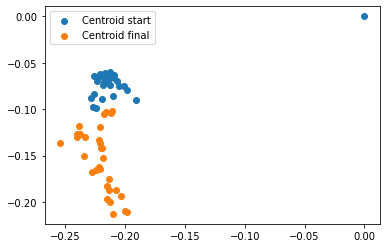

In [26]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

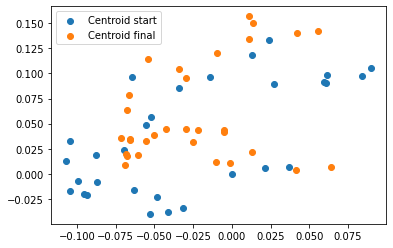

In [27]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [28]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
movement-steps step                                                       
1              0           2.7101          1.5417        0.2314  0.0000   
               1           2.7405          2.4954        0.3149  0.2689   
               2           2.9011          2.5981        0.3527  0.3996   
               3           2.9416          2.5996        0.3782  0.4766   
               4           2.9350          2.4834        0.3938  0.4993   
...                           ...             ...           ...     ...   
5              86          2.9056          2.6592        0.4841  1.0862   
               87          2.9643          2.6069        0.4851  1.0846   
               88          2.9165          2.4743        0.4862  1.0829   
               89          2.8041          2.5125        0.4878  1.0813   
               90          3.0679          2.6661        0.4894  1.0799   

                     closeness  betweenness  centroid-x  centroid-y     links  \
movement-steps step                                                             
1              0        0.3108      60.9891      0.0000      0.0000   80.6111   
               1        0.3106      59.9291     -0.2268     -0.0973  103.6759   
               2        0.3198      58.0697     -0.2240     -0.0988  117.4352   
               3        0.3237      58.8196     -0.2284     -0.0880  128.1019   
               4        0.3293      57.7980     -0.2264     -0.0832  136.6667   
...                        ...          ...         ...         ...       ...   
5              86       0.5072      32.1709      0.0110      0.1342  713.1944   
               87       0.5083      32.0370      0.0112      0.1570  717.8056   
               88       0.5092      31.9809      0.0139      0.1499  722.2407   
               89       0.5102      31.8863      0.0424      0.1407  726.7500   
               90       0.5113      31.7980      0.0557      0.1423  730.8889   

                     total_mood  
movement-steps step              
1              0         4.2518  
               1         5.2359  
               2         5.4992  
               3         5.5412  
               4         5.4184  
...                         ...  
5              86        5.5648  
               87        5.5712  
               88        5.3908  
               89        5.3166  
               90        5.7340  

[273 rows x 10 columns]

/tmp/ipykernel_300791/1052004845.py:48: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


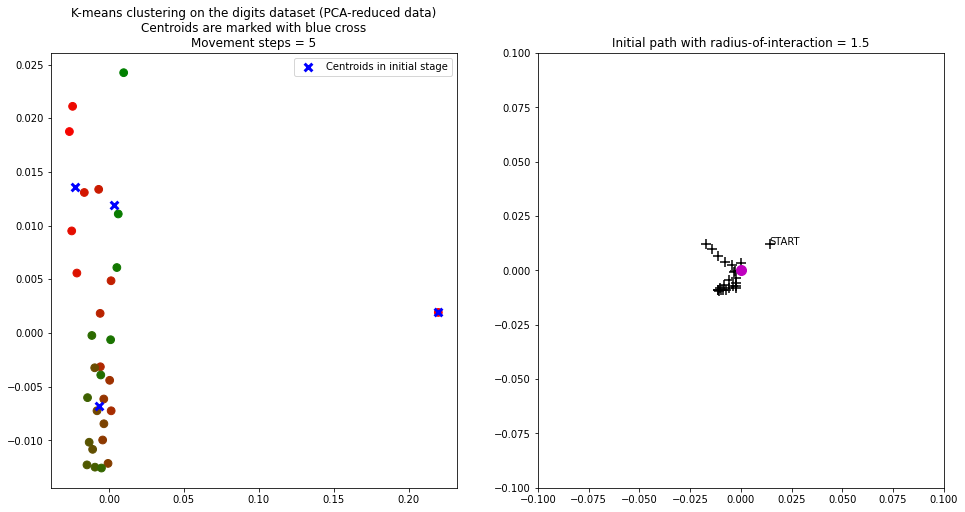

In [29]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()



plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.scatter(0,0,marker='o',s=100,color='m')


plt.show()

In [30]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

(91, 12)

/tmp/ipykernel_300791/112140767.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


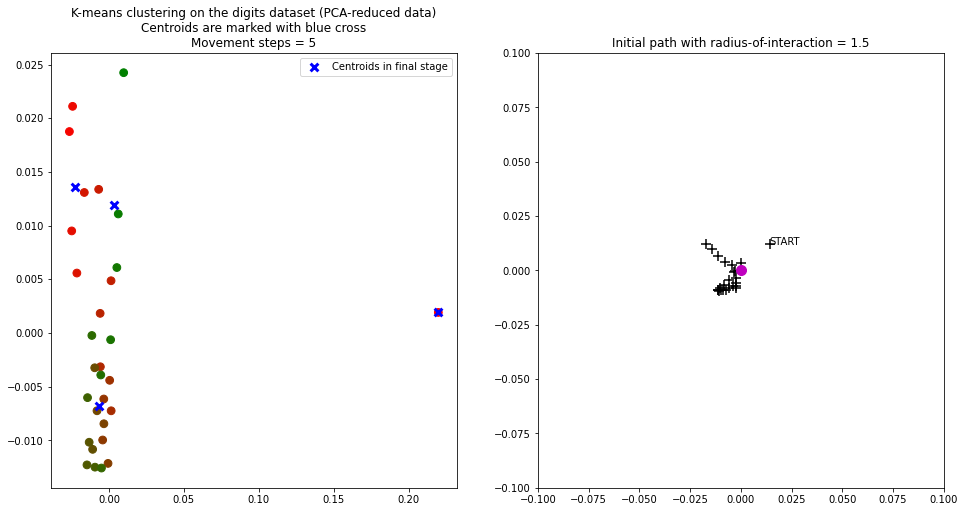

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_300791/2926621981.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


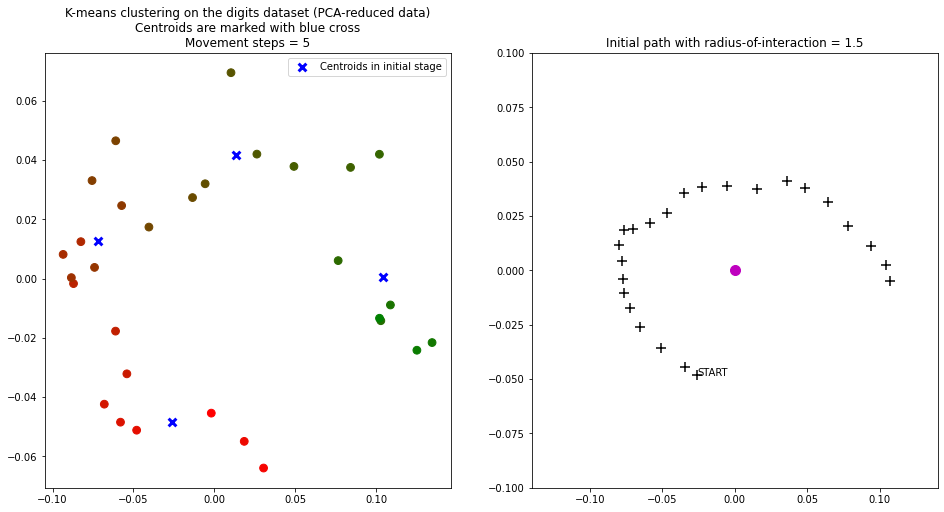

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.14,0.14)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_300791/1187996117.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


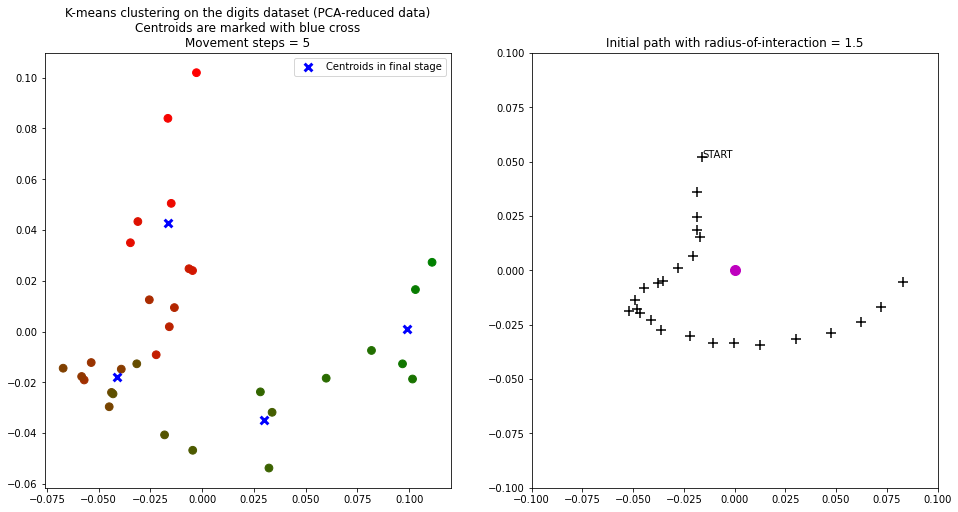

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()